In [33]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [35]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

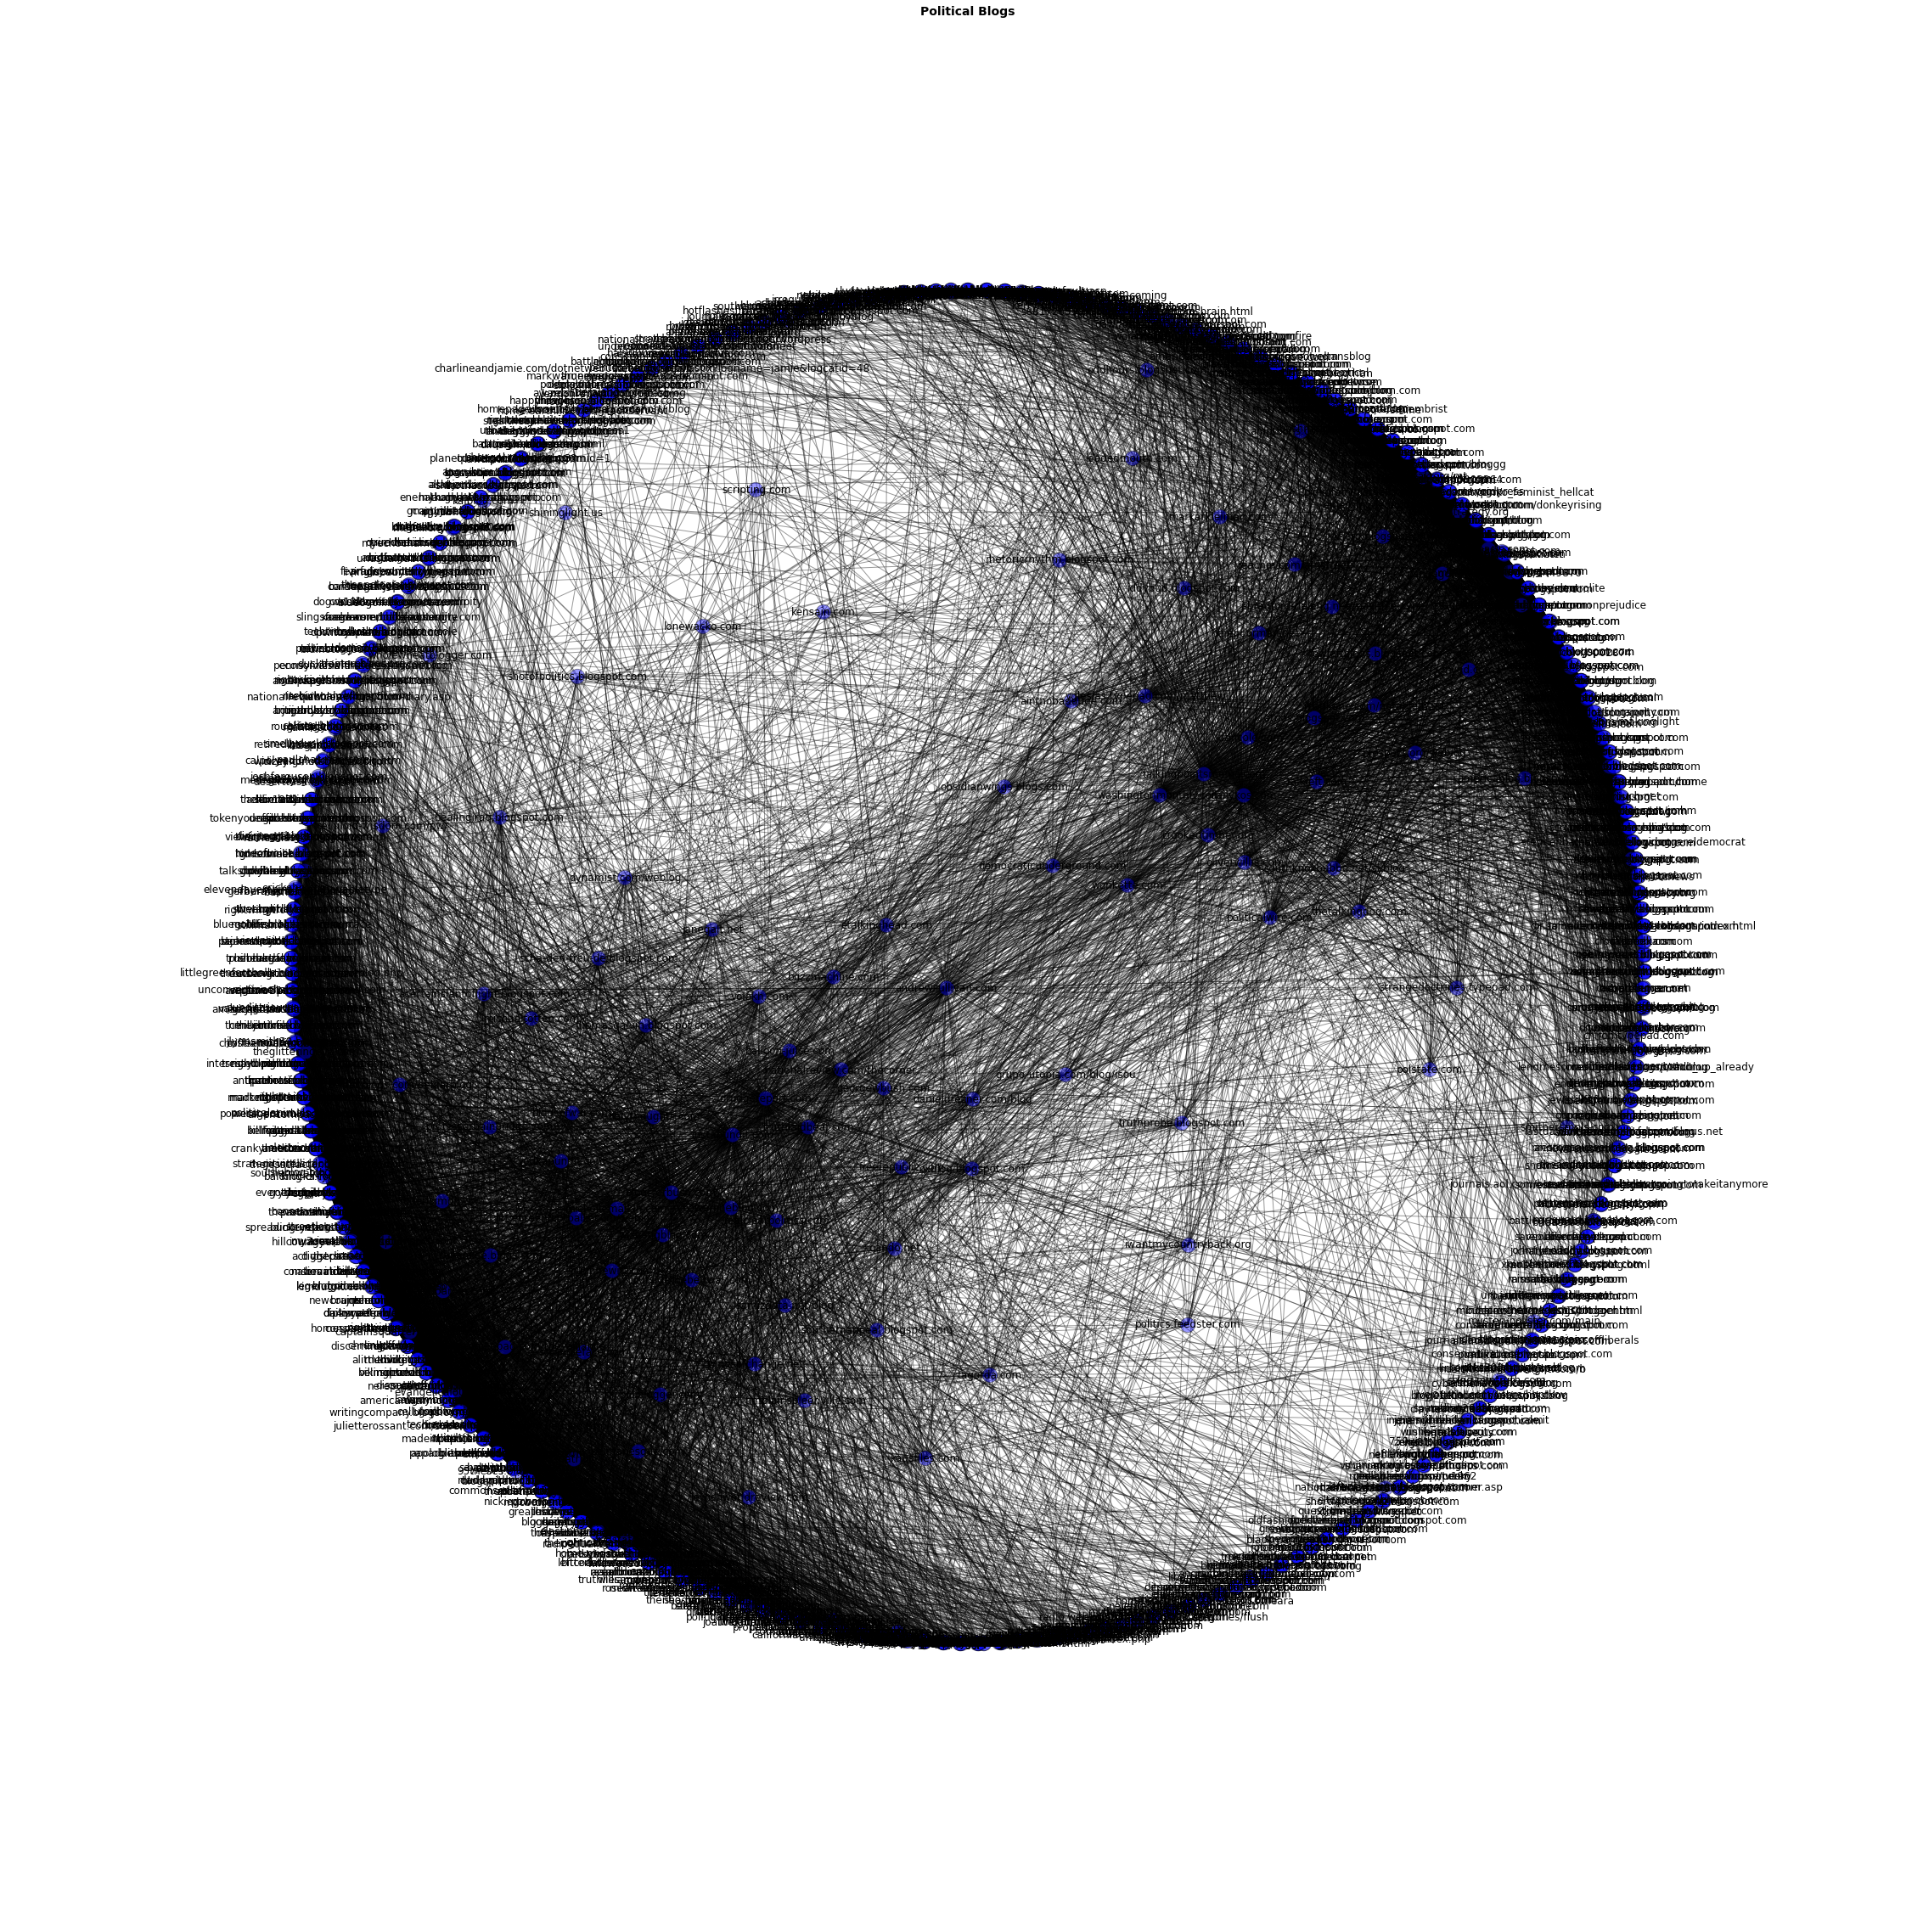

In [36]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Bitstream Vera Sans',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [37]:
centrality=nx.eigenvector_centrality(G)

In [38]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

### 2.  What are the 10 most influential blogs?

In [39]:
(sorted(blog_list, key=lambda x: x[1], reverse=True))[:10]

[(u'atrios.blogspot.com', 0.19459018839191425),
 (u'dailykos.com', 0.16084683098442204),
 (u'washingtonmonthly.com', 0.1457275987357793),
 (u'digbysblog.blogspot.com', 0.14164289959614043),
 (u'bodyandsoul.typepad.com', 0.13999624858261536),
 (u'liberaloasis.com', 0.1386873727117889),
 (u'tbogg.blogspot.com', 0.13693621613319046),
 (u'corrente.blogspot.com', 0.1286489425222739),
 (u'talkingpointsmemo.com', 0.12715004660049478),
 (u'dneiwert.blogspot.com', 0.12145726947709289)]

### 3.  What are the 10 least influential blogs?



In [46]:
((sorted(blog_list, key=lambda x: x[1], reverse=False))[:10])

[(u'thelonedem.com', 1.6009317246533848e-72),
 (u'digital-democrat.blogspot.com', 1.6009317246533848e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.440745165332804e-09),
 (u'quimundus.modblog.com', 6.712245052261443e-08),
 (u'batr.org/commentary.html', 6.76799518211194e-07),
 (u'batr.net', 6.768795535525465e-07),
 (u'democratvoice.org', 1.0419801229535643e-06),
 (u'quimundus.squarespace.com', 6.104960456295939e-06),
 (u'massachusetts-liberal.com', 9.359134361603276e-06),
 (u'thingsasitis.net', 1.1598523486393813e-05)]

###4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)